C:\Users\Yuvasri\AppData\Local\Temp\ipykernel_26256\3557425783.py:16: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')


Mean Squared Error: 8563109.85
Root Mean Squared Error (RMSE): 2926.28
R² Score: 0.89


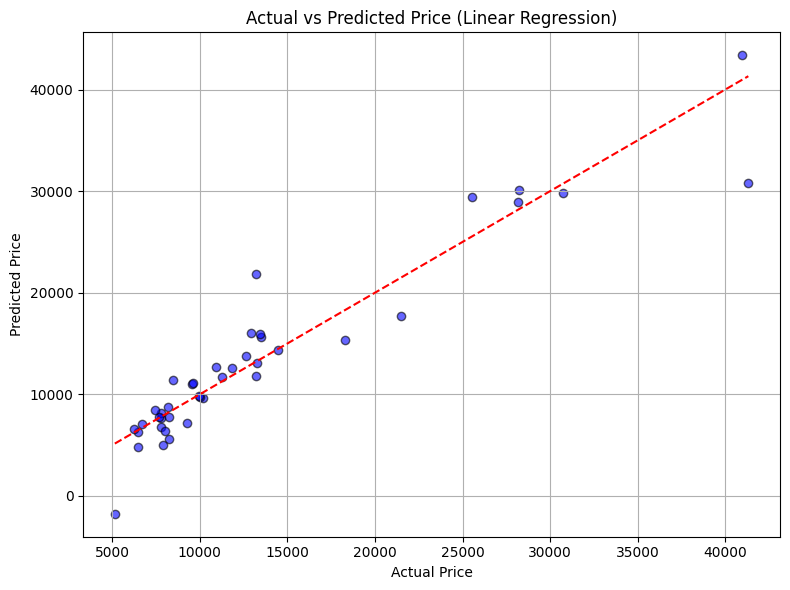

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('Automobile_data.csv')

# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Try converting all columns to numeric where applicable
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')

# Fill missing values in numeric columns using for loop
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    mean_val = df[col].mean()
    df[col] = df[col].fillna(mean_val)

# Fill missing values in non-numeric columns using for loop
non_numeric_cols = df.select_dtypes(include=['object']).columns
for col in non_numeric_cols:
    mode_val = df[col].mode()[0]
    df[col] = df[col].fillna(mode_val)

# One-hot encode categorical columns
df = pd.get_dummies(df, drop_first=True)

# Define features (X) and target (y)
X = df.drop(columns=['price'])
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Scatter Plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price (Linear Regression)")
plt.grid(True)
plt.tight_layout()
plt.show()
